In [199]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [200]:
start = '2017-01-01'
end = '2021-10-01'

In [201]:
data = yf.download('CL=F PTTEP.BK', start=start, end=end, period=1)

[*********************100%***********************]  2 of 2 completed


In [202]:
df = data['Adj Close']

In [203]:
df

,CL=F,PTTEP.BK
Date,,
2017-01-03,52.330002,NaN
2017-01-04,53.259998,76.533470
2017-01-05,53.759998,76.144981
2017-01-06,53.990002,76.533470
2017-01-09,51.959999,75.950729
...,...,...
2021-09-24,73.980003,NaN
2021-09-27,75.449997,114.370789
2021-09-28,75.290001,116.325844


In [204]:
df.isnull().sum()

CL=F        36
PTTEP.BK    77
dtype: int64

In [205]:
df.dropna(inplace=True)

c:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [206]:
df.isnull().sum()

CL=F        0
PTTEP.BK    0
dtype: int64

<AxesSubplot:xlabel='Date'>

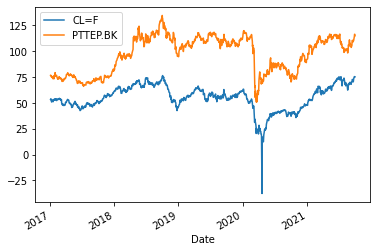

In [207]:
df.plot()

<AxesSubplot:xlabel='Date'>

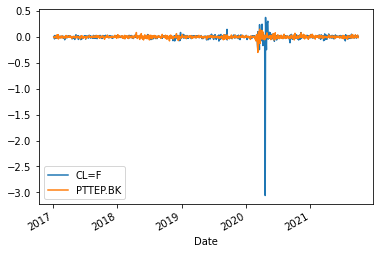

In [208]:
df.pct_change().plot()

<AxesSubplot:xlabel='Date'>

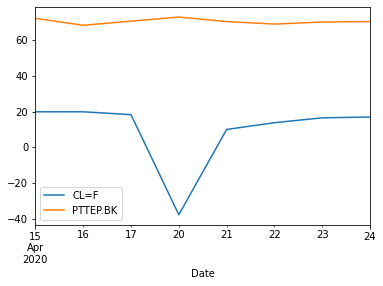

In [209]:
df.loc['2020-04-15':'2020-04-25'].plot()

<AxesSubplot:xlabel='Date'>

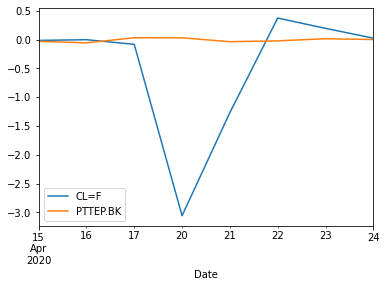

In [210]:
df_ret = df.pct_change()
df_ret.loc['2020-04-15':'2020-04-25'].plot()

In [211]:
start_remove = '2020-04-15'
end_remove = '2020-04-25'

In [212]:
df_clean = df_ret.loc[:'2020-04-13'].append(df_ret.loc['2020-05-01':])

In [213]:
df_clean.loc['2020-04-12':'2020-05-10']

,CL=F,PTTEP.BK
Date,,
2020-04-13,-0.015378,-0.003135
2020-05-05,0.303609,-0.005917
2020-05-07,-0.041124,-0.017857
2020-05-08,0.050531,0.006060


<AxesSubplot:xlabel='Date'>

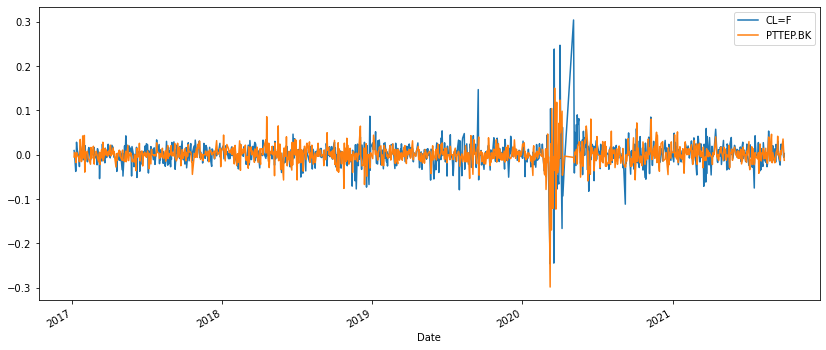

In [214]:
df_clean.plot(figsize=(14,6))

<AxesSubplot:xlabel='CL=F', ylabel='PTTEP.BK'>

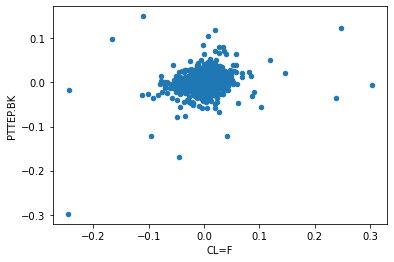

In [215]:
df_clean.plot.scatter(x='CL=F', y='PTTEP.BK')

In [216]:
X = df_clean['CL=F'].iloc[1:]
y = df_clean['PTTEP.BK'].iloc[1:]

In [217]:
m,c = np.polyfit(X, y, 1)

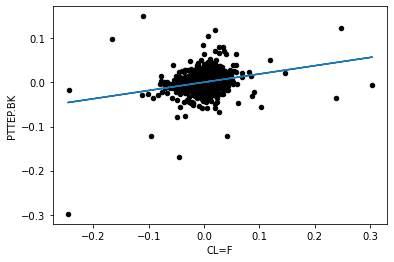

In [218]:
df_clean.plot.scatter(x='CL=F', y='PTTEP.BK', c='k')
plt.plot(X, m*X+c)

In [219]:
Lower_limit = df_clean.quantile(0.01)
Upper_limit = df_clean.quantile(0.99)

In [220]:
Lower_limit

CL=F       -0.077004
PTTEP.BK   -0.056511
Name: 0.01, dtype: float64

In [221]:
Upper_limit

CL=F        0.067670
PTTEP.BK    0.064973
Name: 0.99, dtype: float64

In [222]:
df_cleaner = df_clean[~((df_clean < Lower_limit) | (df_clean > Upper_limit)).any(1)]

In [223]:
df_cleaner

,CL=F,PTTEP.BK
Date,,
2017-01-04,NaN,NaN
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007614
2017-01-10,-0.021940,-0.017903
...,...,...
2021-09-23,0.014814,0.004444
2021-09-27,0.029331,0.035398
2021-09-28,-0.002121,0.017094


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP.BK'>

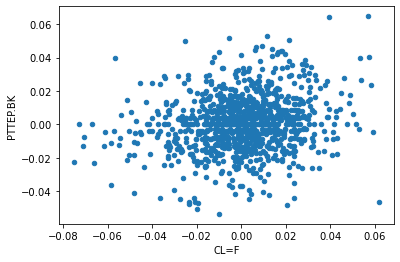

In [224]:
df_cleaner.plot.scatter(x='CL=F', y='PTTEP.BK')

In [225]:
(df_cleaner == 0).any()

CL=F        True
PTTEP.BK    True
dtype: bool

In [226]:
df_cleaner == 0

,CL=F,PTTEP.BK
Date,,
2017-01-04,False,False
2017-01-05,False,False
2017-01-06,False,False
2017-01-09,False,False
2017-01-10,False,False
...,...,...
2021-09-23,False,False
2021-09-27,False,False
2021-09-28,False,False


In [227]:
df_cleaner.loc[(df_cleaner != 0).all(1)]

,CL=F,PTTEP.BK
Date,,
2017-01-04,NaN,NaN
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007614
2017-01-10,-0.021940,-0.017903
...,...,...
2021-09-21,0.003841,0.008969
2021-09-23,0.014814,0.004444
2021-09-27,0.029331,0.035398


In [228]:
df_final = df_cleaner.loc[(df_cleaner != 0).all(1)]

In [229]:
df_final

,CL=F,PTTEP.BK
Date,,
2017-01-04,NaN,NaN
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007614
2017-01-10,-0.021940,-0.017903
...,...,...
2021-09-21,0.003841,0.008969
2021-09-23,0.014814,0.004444
2021-09-27,0.029331,0.035398


In [230]:
df_final = df_final.iloc[1:]

In [231]:
df_final

,CL=F,PTTEP.BK
Date,,
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007614
2017-01-10,-0.021940,-0.017903
2017-01-11,0.028139,0.005208
...,...,...
2021-09-21,0.003841,0.008969
2021-09-23,0.014814,0.004444
2021-09-27,0.029331,0.035398


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP.BK'>

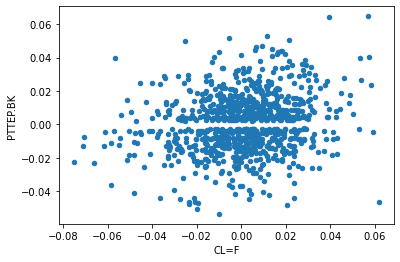

In [232]:
df_final.plot.scatter(x='CL=F', y='PTTEP.BK')

In [233]:
X = df_final['CL=F'].iloc[1:]
y = df_final['PTTEP.BK'].iloc[1:]

In [234]:
m,c = np.polyfit(X, y, 1)

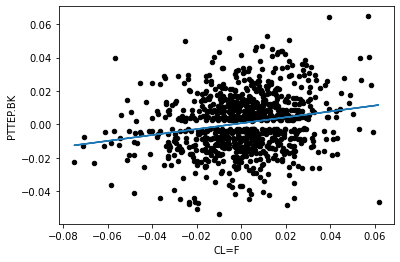

In [235]:
df_final.plot.scatter(x='CL=F', y='PTTEP.BK', c='k')
plt.plot(X, m*X+c)

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics

In [237]:
start = '2017-01-01'
end = '2021-10-01'

In [238]:
data = yf.download('CL=F PTTEP.BK GPSC.BK PTTGC.BK PTT.BK', start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [239]:
df = data['Adj Close']

In [240]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,52.330002,NaN,NaN,NaN,NaN
2017-01-04,53.259998,29.233919,30.196192,76.533470,49.715393
2017-01-05,53.759998,28.641338,30.752432,76.144981,49.909595
2017-01-06,53.990002,28.641338,30.911364,76.533470,49.715393
2017-01-09,51.959999,28.641338,30.434580,75.950729,49.132793
...,...,...,...,...,...
2021-09-24,73.980003,NaN,NaN,NaN,NaN
2021-09-27,75.449997,75.980133,38.509056,114.370789,59.785229
2021-09-28,75.290001,75.240067,38.509056,116.325844,61.721592


In [241]:
df = df.fillna(method='ffill').pct_change()

In [242]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.017772,NaN,NaN,NaN,NaN
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
...,...,...,...,...,...
2021-09-24,0.009277,0.000000,0.000000,0.000000,0.000000
2021-09-27,0.019870,-0.012821,0.012500,0.035398,0.020661
2021-09-28,-0.002121,-0.009740,0.000000,0.017094,0.032389


In [243]:
df = df.dropna()

In [244]:
df = df[(df != 0).all(1)]

In [245]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-10,-0.021940,0.006897,0.013055,-0.017903,0.003953
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
2017-01-17,0.002100,-0.006849,-0.005142,-0.007752,-0.019157
2017-01-18,-0.026677,-0.006897,-0.005168,-0.015625,0.019531
...,...,...,...,...,...
2021-09-08,0.013899,0.003106,-0.006667,-0.013889,0.004219
2021-09-10,0.023188,-0.006231,0.020134,0.004717,-0.004149
2021-09-14,0.000142,-0.003135,0.019608,0.041667,0.004132


In [246]:
df = df[['CL=F', 'GPSC.BK', 'PTTEP.BK', 'PTTGC.BK', 'PTT.BK']]

In [247]:
df.head(1)

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.02027,-0.005076,0.003906,0.018421


In [248]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [249]:
X

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2017-01-05,0.009388,-0.020270,-0.005076,0.003906
2017-01-10,-0.021940,0.006897,-0.017903,0.003953
2017-01-11,0.028139,0.006849,0.005208,-0.003937
2017-01-17,0.002100,-0.006849,-0.007752,-0.019157
2017-01-18,-0.026677,-0.006897,-0.015625,0.019531
...,...,...,...,...
2021-09-08,0.013899,0.003106,-0.013889,0.004219
2021-09-10,0.023188,-0.006231,0.004717,-0.004149
2021-09-14,0.000142,-0.003135,0.041667,0.004132


In [250]:
y

Date
2017-01-05    0.018421
2017-01-10    0.013055
2017-01-11   -0.007732
2017-01-17   -0.005142
2017-01-18   -0.005168
                ...   
2021-09-08   -0.006667
2021-09-10    0.020134
2021-09-14    0.019608
2021-09-21    0.012820
2021-09-27    0.012500
Name: PTT.BK, Length: 663, dtype: float64

### Resubstitution

In [251]:
model = LinearRegression()
reg = model.fit(X, y)

In [252]:
reg.score(X, y)

0.751435734569647

In [253]:
reg.coef_

array([0.00881988, 0.04138212, 0.49392393, 0.25141417])

In [254]:
X.iloc[-5]

CL=F        0.013899
GPSC.BK     0.003106
PTTEP.BK   -0.013889
PTTGC.BK    0.004219
Name: 2021-09-08 00:00:00, dtype: float64

In [255]:
reg.predict(X.iloc[-5].values.reshape(1, -1))

c:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.00552167])

In [256]:
y.iloc[-5]

-0.006666633858078197

### Holdout

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [258]:
X_train

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2017-11-29,-0.011899,-0.013274,-0.016043,0.009554
2020-03-31,0.019413,0.036364,0.071428,0.109091
2021-07-19,-0.075059,0.012618,-0.022321,-0.012931
2020-06-24,-0.058459,-0.025974,-0.036364,-0.036842
2018-03-19,-0.004491,0.006689,-0.004274,-0.024876
...,...,...,...,...
2020-10-16,-0.001953,0.004464,-0.003106,-0.011976
2021-02-19,-0.021150,-0.015823,-0.021930,-0.030534
2020-07-20,0.005420,-0.003356,-0.002660,0.010582


In [259]:
y_train

Date
2017-11-29   -0.004831
2020-03-31    0.060345
2021-07-19   -0.026667
2020-06-24   -0.032258
2018-03-19   -0.021898
                ...   
2020-10-16   -0.007576
2021-02-19   -0.012346
2020-07-20   -0.006452
2020-10-01    0.031250
2018-04-25   -0.008621
Name: PTT.BK, Length: 464, dtype: float64

In [260]:
model = LinearRegression()
reg = model.fit(X_train, y_train)

In [261]:
reg.score(X_test, y_test)

0.6081402508817301

In [262]:
y_pred = model.predict(X_test)

In [263]:
y_pred

array([-1.70860533e-02, -3.23585374e-03, -2.47881858e-02, -8.46150692e-03,
       -1.36529945e-03,  4.05564461e-05,  2.66685575e-03,  4.17573772e-02,
       -2.02939159e-02,  7.71734689e-04,  9.71780961e-03,  3.19722733e-03,
        2.98609010e-02,  2.04381380e-02,  4.14562794e-03, -1.21697748e-02,
       -5.84192237e-03, -7.67034512e-03,  3.97945188e-03,  2.87854317e-03,
        9.37288292e-03, -3.27017569e-03,  2.67948581e-02,  4.17612021e-02,
       -8.98922107e-03,  3.34777119e-02,  1.63684542e-02, -2.12600685e-02,
        2.93177927e-03, -1.08683332e-02,  8.26559898e-03, -1.94291367e-02,
        3.31594194e-02, -6.06248229e-03,  2.67370685e-02,  8.53521038e-03,
        4.31399630e-03, -1.02581419e-02,  4.28199726e-03, -1.64003061e-02,
       -1.15604469e-02, -1.88403982e-03,  1.50137115e-02, -1.09247767e-02,
       -2.49577534e-02, -1.15254258e-02,  4.59198593e-03,  2.73362038e-02,
       -2.84399546e-02, -2.48091455e-03,  1.43355108e-02,  3.67856173e-03,
       -4.47391016e-02,  

In [264]:
print("Score = ", metrics.r2_score(y_test, y_pred))

Score =  0.6081402508817301


In [265]:
reg.coef_

array([0.01504384, 0.04233154, 0.48009616, 0.29157328])

In [266]:
m = model.coef_
b = model.intercept_

In [267]:
m

array([0.01504384, 0.04233154, 0.48009616, 0.29157328])

In [268]:
b

-0.0001895907701252998

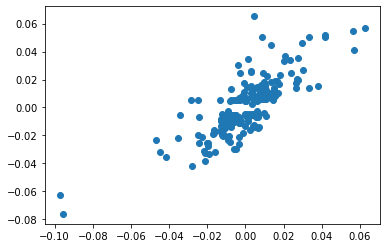

In [269]:
plt.scatter(y_pred, y_test)

In [271]:
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE =  0.00949483578407298
MSE =  0.0001655114433014599
RMSE =  0.012865125079122236
